In [1]:
from CombinedExperiment import CombinedExperiment
from ExperimentConfig import ExperimentConfig
from Experiment import Experiment, RaceResult
from util.snap import snap
from copy import copy
from typing import List
from joblib import Parallel, delayed
from CombinedExperiment import ExperimentResult
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = "5"

version = "v10"
snap(version)
n_races = 1000
base_config = ExperimentConfig(name="none",
                               election_name="none",
                               training_cycles=200000,
                               ideology_range=1.5,
                               ideology_flexibility=.7,
                               n_bins=21,
                               model_width=512,
                               model_layers=3,
                               memory_size=100000,
                               batch_size=2048,
                               training_voters=400,
                               sampling_voters=1000,
                               quality_variance=0,
                               candidate_variance=0.5,
                               equal_pct_bins=True,
                               model_path="none")

irv_config = copy(base_config)
irv_config.election_name = "IRV"
irv_config.model_path = f"exp/{version}/IRV"
irv_config.name = "IRV"

h2h_config = copy(base_config)
h2h_config.election_name = "H2H"
h2h_config.model_path = f"exp/{version}/H2H"
h2h_config.name = "Condorcet-Minimax"

pty_config = copy(base_config)
pty_config.election_name = "Plurality"
pty_config.model_path = f"exp/{version}/plurality"
pty_config.name = "Plurality"

snapdir is snapshots/v10


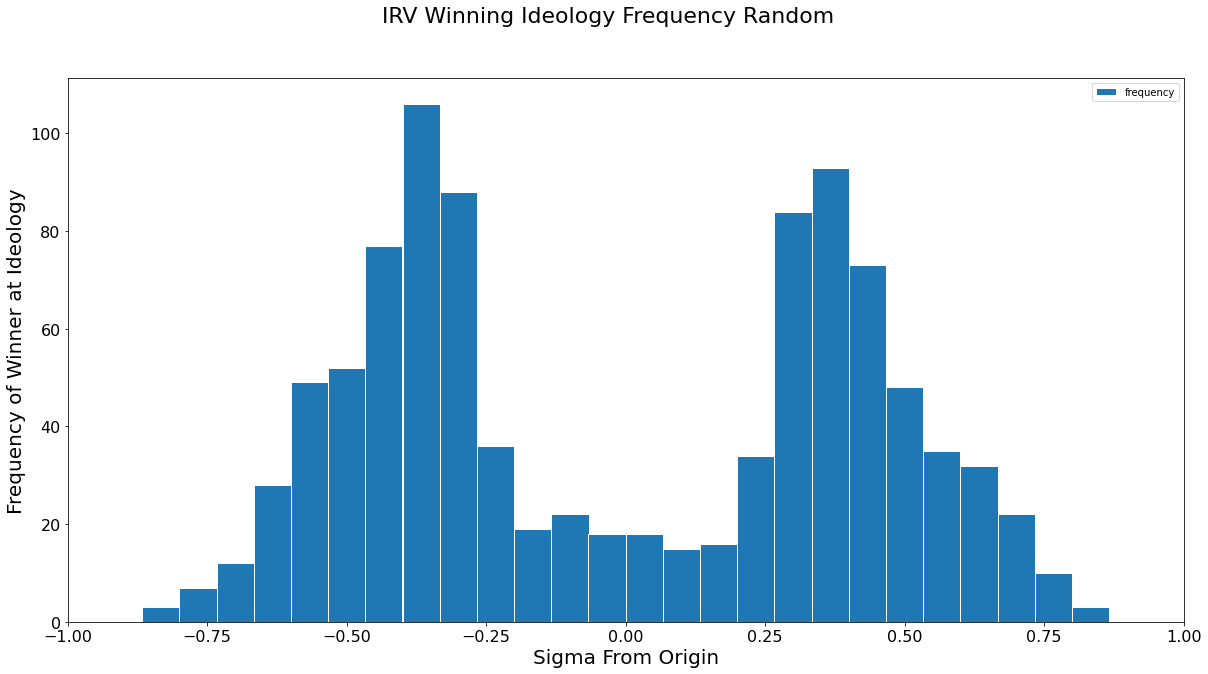

In [2]:
def winning_ideologies(results: List[RaceResult]):
    ideologies = []
    for r in results:
        ideologies.append(r.winner.ideology.vec[0])
    return ideologies

# for flex in [0.0, 0.1, 0.2, .3, .4, .5, .6, .7, .8, .9, 1.0]:
#     print("running at flex %.1f" % flex)
#     cc = copy(irv_config)
#     cc.ideology_flexibility = flex
#     exp = Experiment(cc)
#     race_results = exp.run_strategic_races_par(1000)
#     exp.plot_results(winning_ideologies(race_results), "IRV Winning Ideology Frequency at Flexibility %.1f" % flex, ["frequency"])

exp = Experiment(irv_config)
random_results = exp.compute_random_results_par(1000)
exp.plot_results(winning_ideologies(random_results), "IRV Winning Ideology Frequency Random" , ["frequency"])

In [6]:
def candidate_ideologies(results: List[RaceResult]):
    ideologies = []
    for r in results:
        ci = [c.ideology.vec[0] for c in r.candidates]
        for ii in ci:
            ideologies.append(ii)
    return ideologies

In [7]:
CombinedExperiment.compute_SUE(random_results)

0.35423285436430274

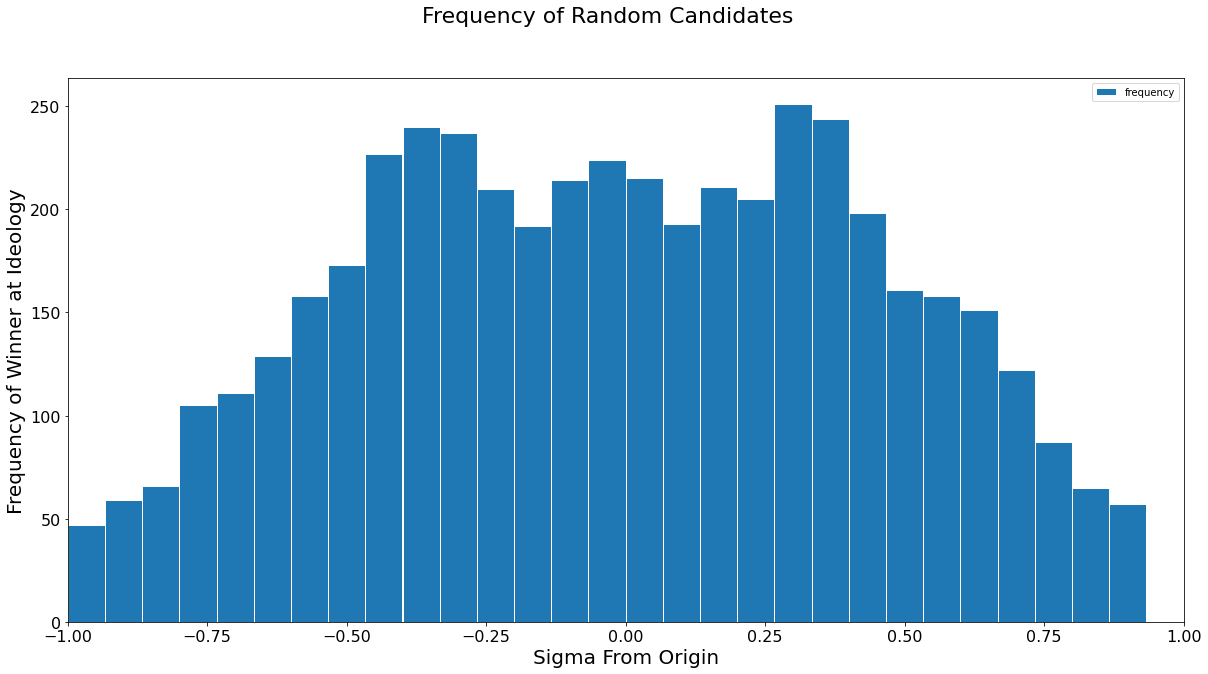

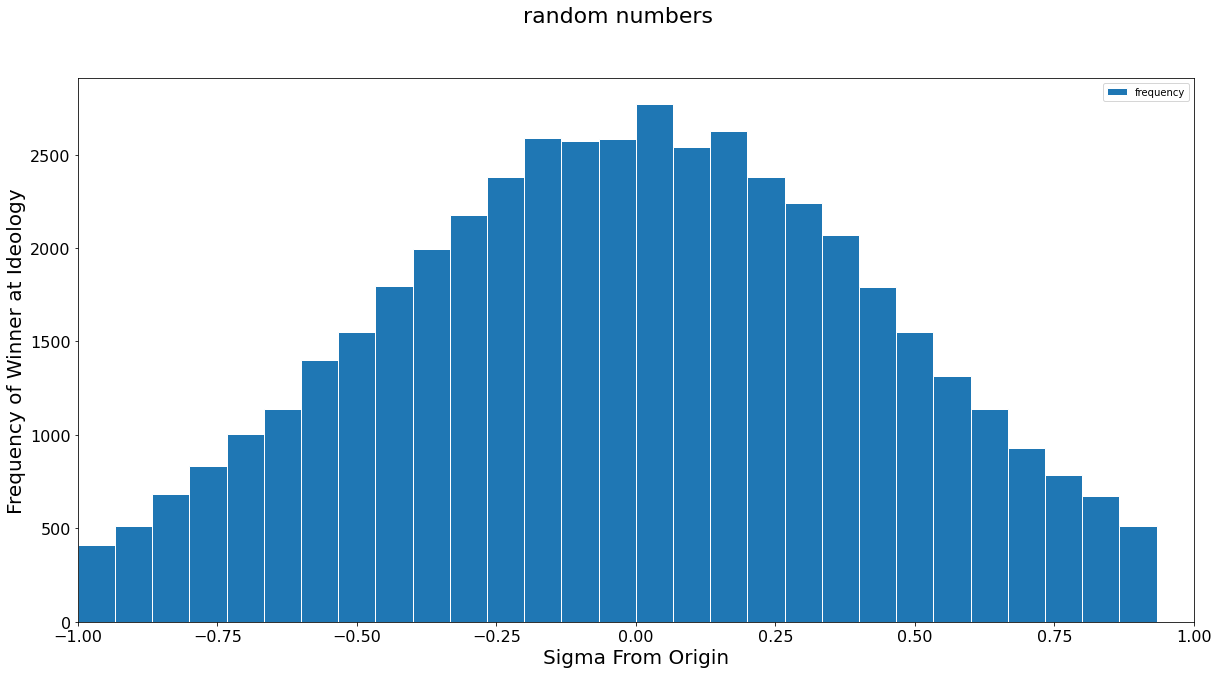

In [33]:
import numpy as np
exp.plot_results(candidate_ideologies(random_results), "Frequency of Random Candidates", ["frequency"])
x = np.zeros(shape=(0,))
zz = []
for i in range(50000):
    z = np.random.normal(0, .5, )
    if abs(z) < 1.5:
        zz.append(z)
    if len(zz) == 5:
        if np.min(zz) < +.25 and np.max(zz) > -.25:
            za = np.array(zz)
            x = np.concatenate((x, za))
        zz = []

exp.plot_results(x, "random numbers", ["frequency"])


